In [2]:
import os
import time
from stat import S_ISREG, ST_CTIME, ST_MODE
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import operator
from collections import Counter
from prettytable import PrettyTable
import scipy.stats as stats

In [3]:

def retrieve_files_recursively_sorted_by_date(dirName):
    """retrieve all files in the supplied directory and its sub directories.
        :param dirName the path of the directory"""

    listOfFiles = list()
    for (dirpath, dirnames, filenames) in os.walk(dirName):
        listOfFiles += [os.path.join(dirpath, file) for file in filenames]
    # for elem in listOfFiles:
    #    print(elem)
    listOfFiles = ((os.stat(path), path) for path in listOfFiles)
    #if order_type  "creation":
    listOfFiles = ((stat[ST_CTIME], path) for stat, path in listOfFiles)
#     else:
#         listOfFiles = ((stat[ST_MTIME], path) for stat, path in listOfFiles)

    listOfFiles = sorted(listOfFiles)
    listOfFiles = [listOfFiles[i][1] for i in range(len(listOfFiles))]
    return listOfFiles

def extract_logs(logs, keyword):
    results = []
    for log in logs:
        if keyword in log:
            results.append(log)
    return results


def extract_imigrants_list(valid_list, deviceName):
    result = []
    for entry in valid_list:
        k = entry[~entry['parent'].str.contains(deviceName)]
        k = k.drop(k[k.parent == "-1"].index)
        result.append(k)
    return result

def find_max_winner(immig_dataframe_list):
    results = {}
    for immig in immig_dataframe_list:
        # convert it to a dictionary <key, value> where key is the device(parent) and value is how many wins
        immigirants_counts_dictionary = dict(Counter(immig['parent']))
        # print(immigirants_counts_dictionary)
        
        temp_dic = max(immigirants_counts_dictionary.items(), key=operator.itemgetter(1))
        results.update({temp_dic[0]: temp_dic[1] - 1}) # -1 since the last entry will be a loss not a winning
    return results


def extract_winners(valid_list):
    result = []
    for entry in valid_list:
        #headers_ = entry.columns # this a workaround the issue of finding 'wasFitter' -> ' wasFitter' when revising the paper for EMSE
        #result.append(entry.loc[entry[headers_[17]] == True])
        result.append(entry.loc[entry['wasFitter'] == True])
    return result

def extract_winners_joules(valid_list):
    result = []
    for entry in valid_list:
        #headers_ = entry.columns  # this a workaround the issue of finding 'wasFitter' -> ' wasFitter' when revising the paper for EMSE
        #result.append(np.asarray(entry.loc[entry['headers_[17]'] == True]['joules']))
        result.append(np.asarray(entry.loc[entry['wasFitter'] == True]['joules']))
    return result

def remove_duplicates(dataframes_list, column_names=['parent']):
    result = []
    for entry in dataframes_list:
        # df[~df['str_name'].str.contains('c')]
        entry = entry.drop_duplicates(subset=column_names, keep='first')
        result.append(entry)
    return result


def get_max_in_dictionary(target_dictionary):
    #for item_ in target_dictionary_list:
    return max(target_dictionary.items(), key=operator.itemgetter(1))  # find max, -1 to subtract the last entry in which the immigrant was not a winner

def save_to_excel(data, filename, dir_):
    if type(data) is not pd.DataFrame:
        data = pd.DataFrame(data)
    with pd.ExcelWriter(dir + "/" + filename + '.xlsx') as writer:
        data.to_excel(writer, sheet_name="data")

In [4]:
islands_datasets_dir = "datasets/islands_experiments/csv"
isolated_datasets_dir = "datasets/isolated_experiments"

plots_dir = "plots/"
is_save_plots = False

In [5]:
# Loading the islands datasets 
N9A6 = []
N6A6 = []
N6A7 = []
MGA6 = []
MGA7 = []

all_logs = retrieve_files_recursively_sorted_by_date(islands_datasets_dir)
for log_ in all_logs:
    if 'N9A6' in log_:
        if '.csv' in log_:
            N9A6.append(pd.read_csv(log_))
    elif 'N6A6' in log_:
        if '.csv' in log_:
            N6A6.append(pd.read_csv(log_))
    elif 'N6A7' in log_:
        if '.csv' in log_:
            N6A7.append(pd.read_csv(log_))
    elif 'MGA6' in log_:
        if '.csv' in log_:
            MGA6.append(pd.read_csv(log_))
    elif 'MGA7' in log_:
        if '.csv' in log_:
            MGA7.append(pd.read_csv(log_))
    else: print("unknown!!!")


print(len(N9A6))
print(len(N6A6))
print(len(N6A7))
print(len(MGA6))
print(len(MGA7))

10
10
10
10
10


In [6]:
# Loading the isolated datasets 

N9A6_isolated = []
N6A6_isolated = []
N6A7_isolated = []
MGA6_isolated = []
MGA7_isolated = []

all_logs = retrieve_files_recursively_sorted_by_date(isolated_datasets_dir)
for log_ in all_logs:
    if 'N9A6' in log_:
        if '.csv' in log_:
            N9A6_isolated.append(pd.read_csv(log_))
    elif 'N6A6' in log_:
        if '.csv' in log_:
            N6A6_isolated.append(pd.read_csv(log_))
    elif 'N6A7' in log_:
        if '.csv' in log_:
            N6A7_isolated.append(pd.read_csv(log_))
    elif 'MGA6' in log_:
        if '.csv' in log_:
            MGA6_isolated.append(pd.read_csv(log_))
    elif 'MGA7' in log_:
        if '.csv' in log_:
            MGA7_isolated.append(pd.read_csv(log_))
    else: print("unknown!!!")


print(len(N9A6_isolated))
print(len(N6A6_isolated))
print(len(N6A7_isolated))
print(len(MGA6_isolated))
print(len(MGA7_isolated))


10
10
10
10
10


In [7]:
# Extract immigrants, then store them without repetions (unique)

N9A6_immigrants_dataframe_list = extract_imigrants_list(N9A6, 'nexus 9.M')
#immigrants_dataframe_list[0].head()
N9A6_immigrants_unique_dataframe_list = remove_duplicates(N9A6_immigrants_dataframe_list, ['parent'])


N6A6_immigrants_dataframe_list = extract_imigrants_list(N6A6, 'nexus 6.M')
#immigrants_dataframe_list[0].head()
N6A6_immigrants_unique_dataframe_list = remove_duplicates(N6A6_immigrants_dataframe_list, ['parent'])


N6A7_immigrants_dataframe_list = extract_imigrants_list(N6A7, 'nexus 6.N')
#immigrants_dataframe_list[0].head()
N6A7_immigrants_unique_dataframe_list = remove_duplicates(N6A7_immigrants_dataframe_list, ['parent'])


MGA6_immigrants_dataframe_list = extract_imigrants_list(MGA6, 'moto g play.M') 
#immigrants_dataframe_list[0].head()
MGA6_immigrants_unique_dataframe_list = remove_duplicates(MGA6_immigrants_dataframe_list, ['parent'])


MGA7_immigrants_dataframe_list = extract_imigrants_list(MGA7, 'moto g play.N') 
#immigrants_dataframe_list[0].head()
MGA7_immigrants_unique_dataframe_list = remove_duplicates(MGA7_immigrants_dataframe_list, ['parent'])


nexus 9.M received successful:  {'nexus 9.M': 0, 'nexus 6.M': 14, 'nexus 6.N': 3, 'moto g play.M': 1, 'moto g play.N': 1}
nexus 6.M received successful:  {'nexus 9.M': 13, 'nexus 6.M': 0, 'nexus 6.N': 8, 'moto g play.M': 6, 'moto g play.N': 2}
nexus 6.N received successful:  {'nexus 9.M': 14, 'nexus 6.M': 6, 'nexus 6.N': 0, 'moto g play.M': 9, 'moto g play.N': 4}
moto g play.M received successful:  {'nexus 9.M': 5, 'nexus 6.M': 4, 'nexus 6.N': 5, 'moto g play.M': 0, 'moto g play.N': 10}
moto g play.N received successful:  {'nexus 9.M': 9, 'nexus 6.M': 1, 'nexus 6.N': 2, 'moto g play.M': 10, 'moto g play.N': 0}
+----------------------+-----------+-----------+-----------+---------------+---------------+
| sent to (successful) | nexus 9.M | nexus 6.M | nexus 6.N | moto g play.M | moto g play.N |
+----------------------+-----------+-----------+-----------+---------------+---------------+
|      nexus 9.M       |    0.0    |    13.0   |    14.0   |      5.0      |      9.0      |
|      nex

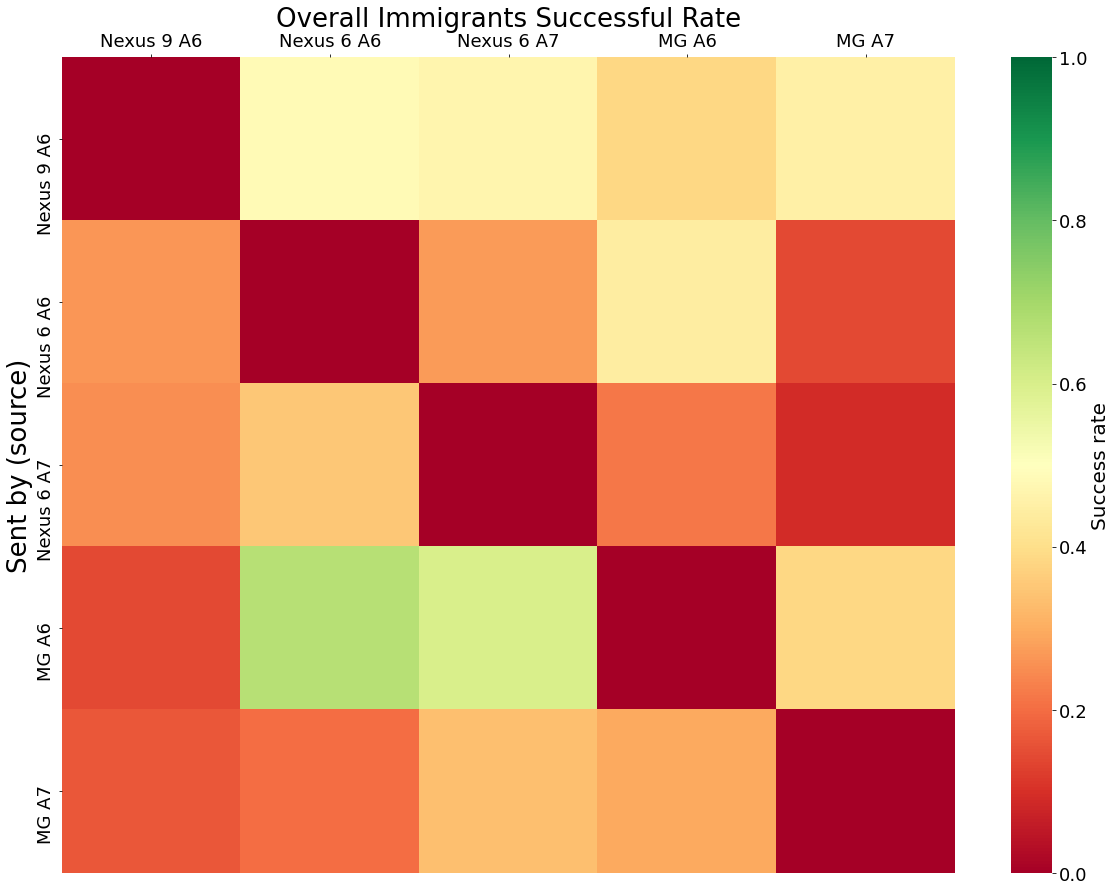

nexus 9.M received successful:  {'nexus 6.N': {50: 1, 40: 2}, 'nexus 6.M': {40: 2, 20: 5, 80: 1, 60: 4, 50: 2}, 'moto g play.M': {30: 1}, 'moto g play.N': {90: 1}}
nexus 6.M received successful:  {'nexus 6.N': {80: 4, 60: 3, 50: 1}, 'nexus 9.M': {60: 3, 40: 3, 30: 3, 20: 2, 70: 2}, 'moto g play.N': {50: 1, 60: 1}, 'moto g play.M': {50: 1, 90: 2, 20: 1, 70: 1, 40: 1}}
nexus 6.N received successful:  {'nexus 9.M': {90: 4, 50: 2, 80: 1, 60: 2, 40: 3, 70: 2}, 'nexus 6.M': {60: 1, 50: 2, 40: 2, 90: 1}, 'moto g play.M': {40: 3, 30: 3, 20: 2, 80: 1}, 'moto g play.N': {20: 2, 30: 1, 90: 1}}
moto g play.M received successful:  {'nexus 6.M': {80: 1, 70: 2, 60: 1}, 'nexus 9.M': {90: 3, 60: 2}, 'moto g play.N': {40: 1, 80: 3, 20: 3, 70: 2, 30: 1}, 'nexus 6.N': {40: 3, 80: 1, 50: 1}}
moto g play.N received successful:  {'moto g play.M': {20: 4, 90: 3, 70: 1, 40: 1, 50: 1}, 'nexus 9.M': {50: 2, 90: 3, 70: 2, 40: 1, 60: 1}, 'nexus 6.N': {90: 1, 40: 1}, 'nexus 6.M': {70: 1}}
nexus 9.M received unsucce

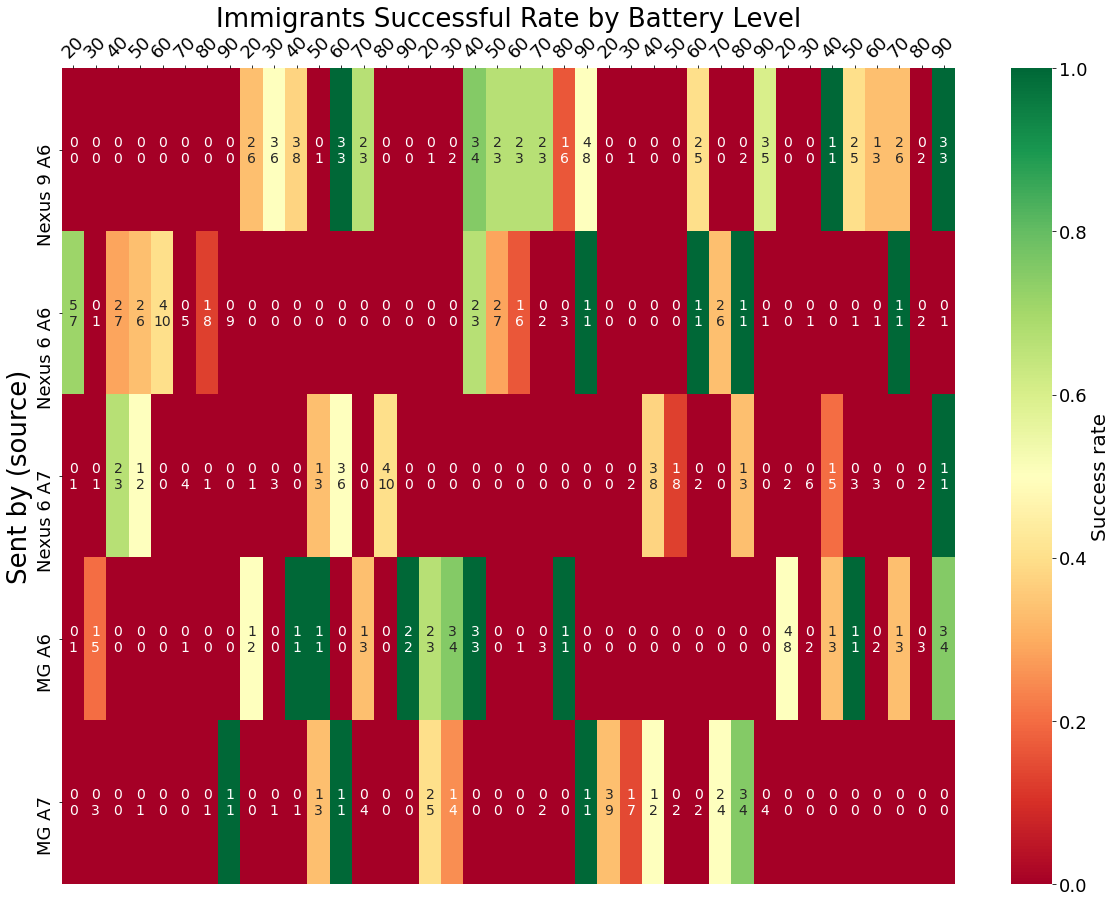

In [8]:
def find_immigrants(immig_dataframe_list, isWinners=True):
    results = {'nexus 9.M': 0, 'nexus 6.M': 0, 'nexus 6.N': 0, 'moto g play.M': 0, 'moto g play.N': 0}

    for immig in immig_dataframe_list:
        # convert it to a dictionary <key, value> where key is the device(parent) and value is how many wins
        if isWinners: parents = immig.loc[immig['wasFitter']]['parent']
        else: parents = immig.loc[~immig['wasFitter']]['parent']
        for parent in parents:
            device_name = '.'.join(parent.split('.')[0:2])
            #print(device_name)
            if device_name in results:
                results[device_name]+=1
            else:
                results[device_name] = 1

    return results

def find_immigrants_by_battery_level(immig_dataframe_list, isWinners=True):
    results = {}
    for immig in immig_dataframe_list:
        # convert it to a dictionary <key, value> where key is the device(parent) and value is how many wins
        # df.loc[df['column_name'] == some_value]

        if isWinners: 
            records = immig.loc[immig['wasFitter'] == True]
        else: records = immig.loc[~immig['wasFitter']]
        
        for ind, record in records.iterrows():
            #print(record)
            device_name = '.'.join(record.parent.split('.')[0:2])
            battery_level = record['battery level']
            
            if device_name in results:
                if battery_level in results[device_name]:
                    results[device_name][battery_level] +=1
                else:
                    results[device_name][battery_level] = 1
                
            else:
                results[device_name] = {battery_level:1}

    return results

def construct_overall_sent_to_table(all_devices_unique_immigrants_dataframe_lists, isSuccessful, headers):
    count=0
    table = np.zeros([len(headers),len(headers)])
    for device_unique_immigrant_list in all_devices_unique_immigrants_dataframe_lists:
        successful_immigrants_all_experiments = find_immigrants(device_unique_immigrant_list, isSuccessful)
        if isSuccessful: print(headers[count]+" received successful: ", successful_immigrants_all_experiments)
        else: print(headers[count]+" received successful: ", successful_immigrants_all_experiments)
        #if type(successful_immigrants_all_experiments.values()) is dict:
            
        table[:,count] += list(successful_immigrants_all_experiments.values())
        count+=1
    return table

def construct_pretty_table_for_print(table, isSuccessful, headers, isBatteryLevel=False):
    myTable = PrettyTable()
    battery_level = []
    if isBatteryLevel:
        battery_level = [str((num%8)+2)+'0' for num in range(len(table[1,:]))]
        
    if isSuccessful: myTable.add_column('sent to (successful)',headers)
    else: myTable.add_column('sent to (unsuccessful)',headers)
        
    if isBatteryLevel: 
        for i in range(len(battery_level)):
            myTable.add_column(battery_level[i],table[:,i])
    else:
        for i in range(len(headers)):
            myTable.add_column(headers[i],table[:,i])
    print(myTable)
    #return myTable
    
    
def construct_overall_sent_to_table_by_battery_level(all_devices_unique_immigrants_dataframe_lists, isSuccessful, headers):
    '''Constructs the matrix that shows the number of immigrants that were sent from a device to another. NOTE: the headers contains the devices names and it must be sorted as all_devices_unique_immigrants_dataframe_lists'''
    count=0
    table = np.zeros([len(headers),len(headers)*8])
    for device_unique_immigrant_list in all_devices_unique_immigrants_dataframe_lists:
        successful_immigrants_all_experiments = find_immigrants_by_battery_level(device_unique_immigrant_list, isSuccessful)
        if isSuccessful: print(headers[count]+" received successful: ", successful_immigrants_all_experiments)
        else: print(headers[count]+" received unsuccessful: ", successful_immigrants_all_experiments)
        
        for dict_key, dict_value in successful_immigrants_all_experiments.items():
            #print(dict_key, dict_value)
            
            for key in dict_value:
                col_index = int(str(int(round(key,-1)))[:1])-2 # (sent to index) since battery levels start from 20 -> round(20) = 20[:1] = 2 - 2 = 0
                row_index = headers.index(dict_key) # sent form index
                
                col_index =col_index+(count*8)
#                 print(key,"->",col_index+(headers.index(dict_key)*8))
#                 print(row_index, dict_key)
                
                table[row_index,col_index] += dict_value[key]
                #print(row_index, col_index, table[row_index,col_index])
        count+=1
            
        #
        
    return table

def create_labels_for_heatmap_cells(succ_table_bl, total_sent_bl):
    success_rate_text_lable = np.zeros([5,40], dtype=object)
    for i in range(len(total_sent_bl)):
        for j in range(len(total_sent_bl[i])):
            success_rate_text_lable[i][j] = str(int(succ_table_bl[i][j]))+'\n'+str(int(total_sent_bl[i][j]))
    #print(len(success_rate_text_lable[0]))
    #print(success_rate_text_lable[1][0])
    return success_rate_text_lable
    
headers = ['nexus 9.M', 'nexus 6.M', 'nexus 6.N', 'moto g play.M', 'moto g play.N'] # this is used in dictionaries

plot_headers = ['Nexus 9 A6', 'Nexus 6 A6', 'Nexus 6 A7', 'MG A6', 'MG A7'] # this for plotting
all_devices_unique_immigrants_dataframe_lists = [N9A6_immigrants_unique_dataframe_list, N6A6_immigrants_unique_dataframe_list,
                                                N6A7_immigrants_unique_dataframe_list, MGA6_immigrants_unique_dataframe_list,
                                                MGA7_immigrants_unique_dataframe_list]


title_font_size=26
legend_size = 22
lable_size = 26
succ_table = construct_overall_sent_to_table(all_devices_unique_immigrants_dataframe_lists, True, headers)
construct_pretty_table_for_print(succ_table, True, headers)
unsucc_table = construct_overall_sent_to_table(all_devices_unique_immigrants_dataframe_lists, False, headers)
construct_pretty_table_for_print(unsucc_table, False, headers)

total_sent = np.add(succ_table, unsucc_table)
print(total_sent)
success_rate = np.divide(succ_table, total_sent, out=np.zeros_like(succ_table), where=total_sent!=0)
print(success_rate)
construct_pretty_table_for_print(success_rate, True, headers)

plt.figure(figsize=(20, 15))
ax = sns.heatmap(success_rate, cmap="RdYlGn", xticklabels=plot_headers, yticklabels=plot_headers , vmin=0, vmax=1, 
                             cbar_kws={'label': 'Success rate'})
ax.figure.axes[-1].yaxis.label.set_size(20)
ax.figure.axes[-1].tick_params(labelsize=18)
ax.set_title("Overall Immigrants Successful Rate", fontsize=title_font_size)
ax.set_ylabel("Sent by (source)", fontsize=lable_size)
#ax.set_xlabel("received in (destination)")
ax.xaxis.tick_top()
ax.tick_params(axis="x", labelsize=18)
ax.tick_params(axis="y", labelsize=18)
#plt.xticks(rotation=45)

plt.savefig(plots_dir + 'immig-suucess-rate-overall',facecolor='w', dpi=100)
plt.show()

#all_devices_unique_immigrants_dataframe_lists = [N6A6_immigrants_unique_dataframe_list]
# successful_immigrants_all_experiments_by_battery_level = find_immigrants_by_battery_level(MGA7_immigrants_unique_dataframe_list)
# unsuccessful_immigrants_all_experiments_by_battery_level = find_immigrants_by_battery_level(MGA7_immigrants_unique_dataframe_list, False)
# print("Nexus9A6 recieved successful by battery level: ", successful_immigrants_all_experiments_by_battery_level)
# print("Nexus9A6 recieved unsuccessful by battery level: ", unsuccessful_immigrants_all_experiments_by_battery_level)

succ_table_bl = construct_overall_sent_to_table_by_battery_level(all_devices_unique_immigrants_dataframe_lists, True, headers)
unsucc_table_bl = construct_overall_sent_to_table_by_battery_level(all_devices_unique_immigrants_dataframe_lists, False, headers)
total_sent_bl = np.add(succ_table_bl, unsucc_table_bl)
success_rate_bl = np.divide(succ_table_bl, total_sent_bl, out=np.zeros_like(succ_table_bl), where=total_sent_bl!=0)


construct_pretty_table_for_print(success_rate_bl, True, headers, True) #very big (zoom out the see it completely)
#print(ta)
battery_level = [str((num%8)+2)+'0' for num in range(len(success_rate_bl[1,:]))]
success_rate_text_lable = create_labels_for_heatmap_cells(succ_table_bl, total_sent_bl)
plt.figure(figsize=(20, 15))
ax = sns.heatmap(success_rate_bl, cmap="RdYlGn", 
                 xticklabels=battery_level, yticklabels=plot_headers, 
                 vmin=0, vmax=1, cbar_kws={'label': 'Success rate'},
                 annot=success_rate_text_lable, fmt='', annot_kws={"fontsize":14},
                )
ax.figure.axes[-1].yaxis.label.set_size(20)
ax.figure.axes[-1].tick_params(labelsize=18)
ax.set_title("Immigrants Successful Rate by Battery Level", fontsize=title_font_size)
ax.set_ylabel("Sent by (source)", fontsize=lable_size)
#ax.set_xlabel("received in (destination)")
ax.xaxis.tick_top()
plt.xticks(rotation=45)
#plt.yticks(horizontalalignment="center")
ax.tick_params(axis="x", labelsize=18)
ax.tick_params(axis="y", labelsize=18)

plt.savefig(plots_dir + 'immig-suucess-rate-by-battery',facecolor='w', dpi=100)
plt.show()

#save_to_excel(success_rate_bl, 'matrtix_by_battery_levels', 'datasets/')
        


In [9]:
dirc = 'E:/island-isolated/results/islands/complete'
logs = retrieve_files_recursively_sorted_by_date(dirc)
logs = extract_logs(logs, 'energyList.csv')

In [10]:

number_of_evaluations = np.zeros([11,5])
elapsed_time = np.zeros([11,5])
device_names = ['nexus9-2','nexus6-1', 'nexus6-3', 'moto-g-3', 'moto-g-4']
print(device_names)
i = 0
count=0
for log in logs:
    for k in range(len(device_names)):
        #print(device_names[k])
        if device_names[k] in log:
            print(i,k)
            temp = pd.read_csv(log)        
            first_interval = temp[(temp['average percentage'] <= 100) & (temp['average percentage'] > 90)]['system time'].to_list()
            print(log, len(first_interval))
            number_of_evaluations[i,k] = len(first_interval)
            elapsed_time[i,k] = (first_interval[-1] - first_interval[0])
            count+=1
            if(count == 5):
                i+=1
                count=0

number_of_evaluations

['nexus9-2', 'nexus6-1', 'nexus6-3', 'moto-g-3', 'moto-g-4']
0 1
E:/island-isolated/results/islands/complete\1\nexus6-1\2020-11-23_03-41-02\0\files\nexus 6-1_OptOnPhone-freq- 1.728GHz-energyList.csv 51
0 0
E:/island-isolated/results/islands/complete\1\nexus9-2\2020-11-23_03-40-55\0\files\nexus 9-2_OptOnPhone-freq- 1.428GHz-energyList.csv 158
0 2
E:/island-isolated/results/islands/complete\1\nexus6-3\2020-11-23_03-41-33\0\files\nexus 6-3_OptOnPhone-freq- 1.728GHz-energyList.csv 148
0 4
E:/island-isolated/results/islands/complete\1\moto-g-4\2020-11-23_03-40-19\0\files\moto g play-4_OptOnPhone-freq- 1.152GHz-energyList.csv 114
0 3
E:/island-isolated/results/islands/complete\1\moto-g-3\2020-11-24_02-10-06\0\files\moto g play-3_OptOnPhone-freq- 1.152GHz-energyList.csv 189
1 1
E:/island-isolated/results/islands/complete\4\nexus6-1\2020-11-27_02-11-41\0\files\nexus 6-1_OptOnPhone-freq- 1.728GHz-energyList.csv 53
1 0
E:/island-isolated/results/islands/complete\4\nexus9-2\2020-11-27_02-11-29\0\

array([[158.,  51., 148., 189., 114.],
       [155.,  53., 143., 167., 140.],
       [142.,  41., 138., 145., 133.],
       [197.,  31., 131., 173., 119.],
       [141.,  30., 130., 181., 131.],
       [136.,  43., 132., 192., 124.],
       [169.,  42., 142., 151., 133.],
       [137.,  51., 141., 163., 126.],
       [131.,  47., 120., 193., 116.],
       [149.,  38., 116., 178., 131.],
       [163.,  33., 124., 180., 115.]])

In [11]:
N9A6_sizes = []
N6A6_sizes = []
N6A7_sizes = []
MGA6_sizes = []
MGA7_sizes = []
for i in range(10):
    N9A6_sizes.append(len(N9A6_isolated[i]))
    N6A6_sizes.append(len(N6A6_isolated[i]))
    N6A7_sizes.append(len(N6A7_isolated[i]))
    MGA6_sizes.append(len(MGA6_isolated[i]))
    MGA7_sizes.append(len(MGA7_isolated[i]))

print(N9A6_sizes,N6A6_sizes, N6A7_sizes, MGA6_sizes, MGA7_sizes)

[688, 838, 800, 704, 1058, 670, 630, 856, 700, 784] [420, 192, 176, 162, 206, 198, 150, 184, 160, 158] [564, 442, 580, 608, 550, 936, 626, 528, 680, 1054] [1906, 1078, 1102, 980, 796, 780, 2578, 1720, 1134, 848] [904, 786, 896, 736, 722, 568, 1042, 754, 940, 1024]


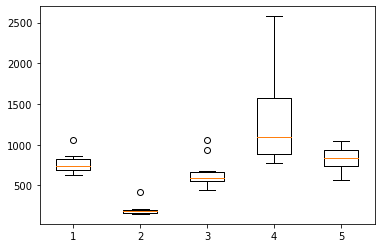

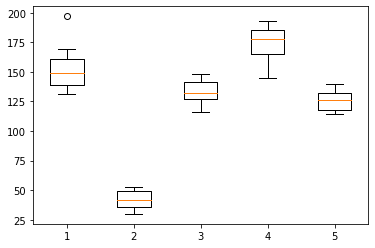

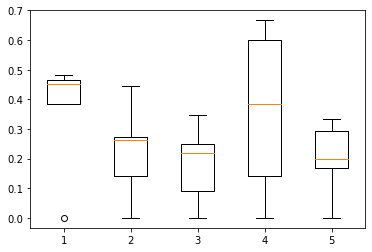

[[158.  51. 148. 189. 114.]
 [155.  53. 143. 167. 140.]
 [142.  41. 138. 145. 133.]
 [197.  31. 131. 173. 119.]
 [141.  30. 130. 181. 131.]
 [136.  43. 132. 192. 124.]
 [169.  42. 142. 151. 133.]
 [137.  51. 141. 163. 126.]
 [131.  47. 120. 193. 116.]
 [149.  38. 116. 178. 131.]
 [163.  33. 124. 180. 115.]] 
 [1678.  460. 1465. 1912. 1382.]
[[0.         0.48148148 0.46666667 0.38461538 0.45      ]
 [0.26415094 0.         0.27272727 0.44444444 0.14285714]
 [0.25       0.34782609 0.         0.2173913  0.09090909]
 [0.14285714 0.66666667 0.6        0.         0.38461538]
 [0.16666667 0.2        0.33333333 0.29411765 0.        ]] 
 [1.78276353 1.1241798  0.90612648 1.79413919 0.99411765]


SpearmanrResult(correlation=0.6, pvalue=0.28475697986529375)

In [15]:
plt.boxplot([N9A6_sizes,N6A6_sizes, N6A7_sizes, MGA6_sizes, MGA7_sizes])
plt.show()

plt.boxplot(number_of_evaluations)
plt.show()

plt.boxplot(success_rate.T)
plt.show()


x1 = np.sum(number_of_evaluations, axis=0)
x2 = np.sum(success_rate, axis=1)
print(number_of_evaluations,'\n', x1)
print(success_rate,'\n', x2)
stats.spearmanr(x2, x1)